## Connection to Firebase

In [1]:
import firebase_admin
from firebase_admin import credentials
from firebase_admin import db

cred = credentials.Certificate("key.json")
firebase_admin.initialize_app(cred,
                             {'databaseURL': 'https://esp32wifitest-4f0ee-default-rtdb.europe-west1.firebasedatabase.app/'})

node = "2021-06-22_18:39:13"

## Plot Setup

<IPython.core.display.Javascript object>


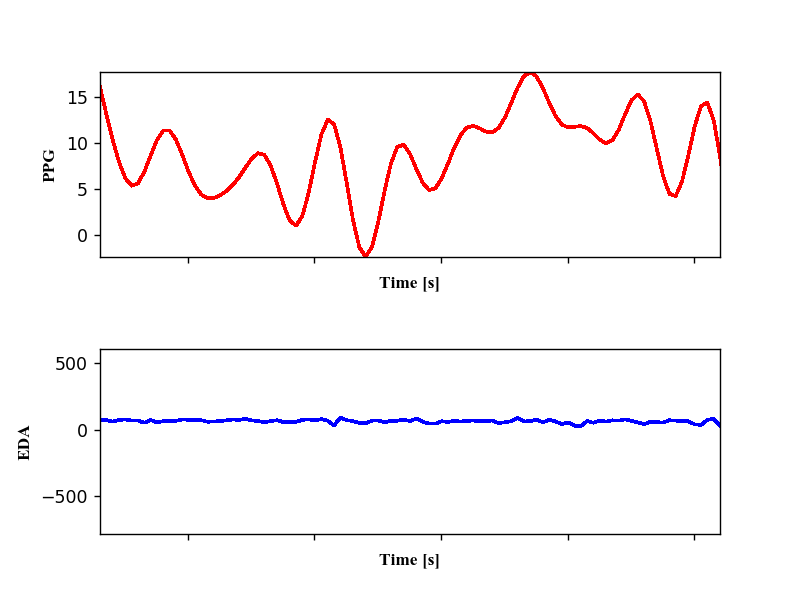

In [3]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
%matplotlib notebook

plt.rcParams['animation.html'] = 'jshtml'

fig = plt.figure()
ax1 = fig.add_subplot(2,1,1); plt.xlabel('Time [s]',fontname = "Times New Roman"); plt.ylabel('PPG',fontname = "Times New Roman")
ax2 = fig.add_subplot(2,1,2); plt.xlabel('Time [s]',fontname = "Times New Roman"); plt.ylabel('EDA',fontname = "Times New Roman")
ax1.set_xticklabels([]); ax2.set_xticklabels([])
plt.subplots_adjust(hspace=0.5)

fig.show()

## Plot Infinite Loop + Get Data From Firebase

In [ ]:
while True:
    last_JSON   = db.reference(node).order_by_key().limit_to_last(1).get()
    Data_dict   = list(last_JSON.items())[0][1]
    Data_str    = list(Data_dict.items())[0][1]
    Data        = np.array(list(map(lambda x: x.split(","),Data_str))).astype(np.float)
    
    #ref_t   = db.reference("2021-06-08_16:46:06").order_by_key().limit_to_last(1).get()
    #tuple_t = list(ref_t.items())
    #last_t_key = tuple_t[0]
    
    # FILTERS
    b, a = signal.butter(5, 0.2, 'lowpass', analog=False, output='ba')
    Data[:,1] = signal.filtfilt(b,a, Data[:,1]) # Filter PPG 
    
    #[t, PPGval, EDAval, ACCval] = last_t_key[1].split(',')
    # Append data
    #time.append(t)
    #PPG.append(PPGval)
    #EDA.append(EDAval)
    
    # Plot Settings
    ax1.set_xlim(left=Data[:,0][0], right=Data[:,0][98])
    ax2.set_xlim(left=Data[:,0][0], right=Data[:,0][98])
    
    ax1.set_ylim(bottom=min(Data[:,1]), top=max(Data[:,1]))
    
    ax1.plot(Data[:,0], Data[:,1], color='r')
    ax2.plot(Data[:,0], Data[:,2], color='b')
    
    
    fig.canvas.draw()
    

C:\Users\Pedro\Anaconda3\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


## Tests

In [9]:
#ref = db.reference("2021-06-08_16:46:06").child("Value")
#snapshot = ref.order_by_key().limit_to_last(1).get()
#tuple_list = list(snapshot.items())
#key_value = tuple_list[0]
#tuple_list
#key_value[1]

last_JSON   = db.reference(node).order_by_key().limit_to_last(1).get()
Data_dict   = list(last_JSON.items())[0][1]
Data_str    = list(Data_dict.items())[0][1]
Data        = np.array(list(map(lambda x: x.split(","),Data_str)))

#list(map(eval, Data[:,0][0:50][0]))
Data[:,0][0:50].astype(np.float)

array([2286249., 2286250., 2286251., 2286251., 2286252., 2286253.,
       2286256., 2286259., 2286262., 2286265., 2286268., 2286270.,
       2286273., 2286276., 2286279., 2286282., 2286285., 2286288.,
       2286291., 2286294., 2286297., 2286300., 2286303., 2286306.,
       2286309., 2286312., 2286315., 2286318., 2286321., 2286324.,
       2286327., 2286329., 2286332., 2286340., 2286350., 2286360.,
       2286370., 2286380., 2286390., 2286400., 2286410., 2286420.,
       2286430., 2286440., 2286450., 2286460., 2286470., 2286480.,
       2286490., 2286500.])

In [ ]:
plt.close()

C:\Users\Pedro\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1773: UserWarning: nperseg = 256 is greater than input length  = 200, using nperseg = 200
  .format(nperseg, input_length))


<IPython.core.display.Javascript object>


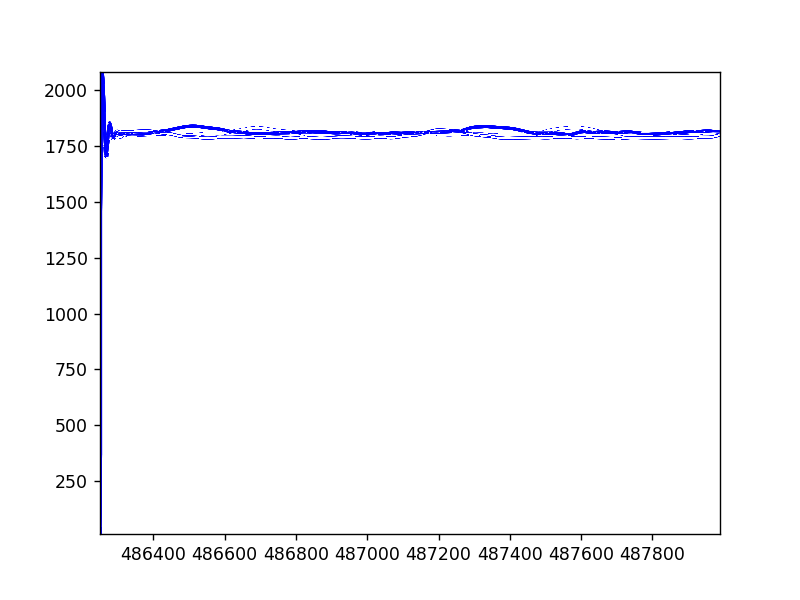

In [17]:
from scipy.signal import butter, lfilter, freqz
import matplotlib.pyplot as plt
last_JSON   = db.reference(node).order_by_key().limit_to_last(1).get()
Data_dict   = list(last_JSON.items())[0][1]
Data_str    = list(Data_dict.items())[0][1]
Data        = np.array(list(map(lambda x: x.split(","),Data_str))).astype(np.float)

b, a = signal.butter(5, 0.3, 'lowpass', analog=False, output='ba')
Data[:,1] = signal.lfilter(b,a, Data[:,1])

freqs, psd = signal.welch(Data[:,1])

fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

ax1.plot(freqs*100,psd)

In [32]:
b, a = signal.butter(5, 30, 'lowpass', analog=False, output='ba', 100)
w, h = signal.freqs(b, a)
plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(100, color='green') # cutoff frequency
plt.show()